# 1. PYTHON ASSIGNMENT 2

##                                                                                                              -By MUDRIKA YAUVANSHI

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
color=sns.color_palette()

In [2]:
data=pd.read_csv(r"C:\Users\honey\Downloads\playstore-analysis.csv")

In [3]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
data.shape

(10841, 13)

In [5]:
data.describe()

Rating           Size
count  9367.000000   10841.000000
mean      4.193338   21516.529524
std       0.537431   20746.537567
min       1.000000       8.500000
25%       4.000000    5900.000000
50%       4.300000   18000.000000
75%       4.500000   26000.000000
max      19.000000  100000.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# 1. Data clean up – Missing value treatment


### a. Drop records where rating is missing since rating is our target/study variable


In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
data.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   float64
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [10]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column

#### i. Are all 3 records having the same problem?

In [11]:
result=data.loc[data['Android Ver'].isnull()]

In [12]:
result

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

#### ii. Drop the 3rd record (i.e. record for “Life Made WIFI …”)

In [13]:
data.drop(data[data["App"] == "Life Made WI-Fi Touchscreen Photo Frame"].index, inplace = True )

In [14]:
result

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

#### iii. Replace remaining missing values with the mode

In [15]:
data['Android Ver'].fillna(data['Android Ver']. mode()[0], inplace=True)

In [16]:
data.loc[4453]

App               [substratum] Vacuum: P
Category                 PERSONALIZATION
Rating                               4.4
Reviews                              230
Size                               11000
Installs                          1,000+
Type                                Paid
Price                              $1.49
Content Rating                  Everyone
Genres                   Personalization
Last Updated               July 20, 2018
Current Ver                          4.4
Android Ver                   4.1 and up
Name: 4453, dtype: object

Here the android version of is shown as 4.1 and up which is the mode of the column android version

#### c. Current ver – replace with most common value

In [17]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0],inplace=True)

In [18]:
data['Current Ver'].isnull().sum()

0

### 2. Data clean up – correcting the data types

#### a. Which all variables need to be brought to numeric types?

In [19]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [20]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Here we can change reviews, installs, price to int type

#### b. Price variable – remove $ sign and convert to float

In [21]:
data["Price"] = data["Price"].map(lambda x: x.lstrip("$"))


In [24]:
data["Price"] = data["Price"].astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.3+ MB


#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [28]:
data["Installs"] = data["Installs"].map(lambda x: x.replace(",",""))
data["Installs"] = data["Installs"].map(lambda x: x.rstrip("+"))

In [30]:
data["Installs"] = data["Installs"].astype('int')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.3+ MB


#### d. Convert all other identified columns to numeric

In [32]:
data["Reviews"] = data["Reviews"].astype('int')

In [34]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 3. Sanity checks – check for the following and handle accordingly

#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore. Are there any such records? Drop if so.

In [36]:
data.loc[data.Rating<1] & data.loc[data.Rating>5]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

####  b. Reviews should not be more than installs as only those who installed can review the app. Are there any such records? Drop if so

In [37]:
data.drop(data[data["Reviews"]>data["Installs"]].index, inplace = True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9359 non-null   object 
 1   Category        9359 non-null   object 
 2   Rating          9359 non-null   float64
 3   Reviews         9359 non-null   int32  
 4   Size            9359 non-null   float64
 5   Installs        9359 non-null   int32  
 6   Type            9359 non-null   object 
 7   Price           9359 non-null   float64
 8   Content Rating  9359 non-null   object 
 9   Genres          9359 non-null   object 
 10  Last Updated    9359 non-null   object 
 11  Current Ver     9359 non-null   object 
 12  Android Ver     9359 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 950.5+ KB


## 4. Identify and handle outliers – 

### a. Price column

#### i. Make suitable plot to identify outliers in price

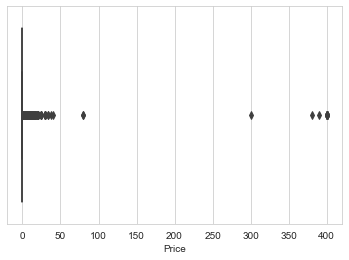

In [39]:
sns.boxplot(x=data["Price"])


#### ii. Do you expect apps on the play store to cost $200? Check out these cases 

In [46]:
print('No ,There are no apps on play store that costs $200')
data[data["Price"]==200]

No ,There are no apps on play store that costs $200


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

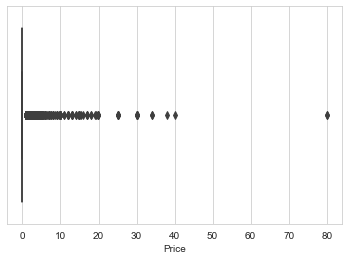

In [47]:
data.drop(data[data["Price"]>200].index, inplace = True )
sns.boxplot(x=data["Price"])

####  iv. Limit data to records with price < $30

In [48]:
data.drop(data[data["Price"]>30].index, inplace = True )

### b. Reviews column

#### i. Make suitable plot

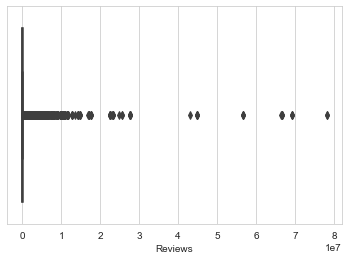

In [49]:
sns.boxplot(data['Reviews'])


#### ii. Limit data to apps with < 1 Million reviews

In [50]:
million1 = data[data['Reviews'] > 1000000 ].index
data.drop(labels = million1, inplace=True)
print(million1.value_counts().sum(),'cols dropped')

704 cols dropped


### c. Installs

#### i. What is the 95th percentile of the installs?

In [51]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8634, dtype: int32

In [52]:
percentile = data.Installs.quantile(0.95)


In [53]:
print("95th percentile of Installs is ",percentile)

95th percentile of Installs is  10000000.0


#### ii. Drop records having a value more than the 95th percentile

In [55]:
data.drop(data[data["Installs"]>10000000.0].index, inplace = True )

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

### a. How do you explain this?

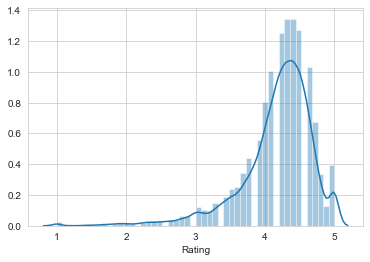

In [56]:
sns.distplot(data['Rating'])

So from here we concluded that our data is skewed at right side.


### b. What is the implication of this on your analysis?

As the data is right skewed this means maximum number of data is present on the right side of the graph i.e., between the range 4-5 which shows most of the apps are rated between 4 to 5

In [59]:
data['Rating'].mode()

0    4.3
dtype: float64

## 6. What are the top Content Rating values?

### a. Are there any values with very few records?

In [60]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

This shows that "Unrated" and "Adults only 18+" have very few records.

### b. If yes, drop those as they won’t help in the analysis

In [62]:
few= (data.groupby('Content Rating').filter(lambda x : len(x)<=3)).index
data.drop(few, inplace= True)

In [63]:
data["Content Rating"].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating

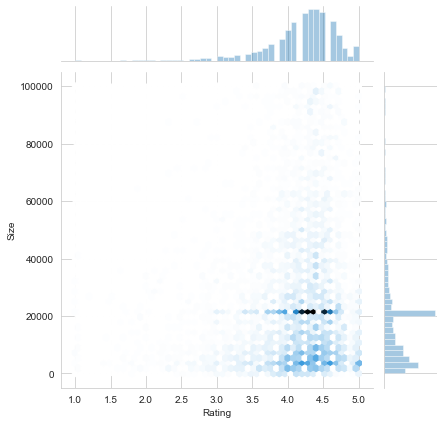

In [64]:
sns.jointplot(y ='Size', x ='Rating', data = data, kind ='hex')

### b. Do you see any patterns?

We can see that there is a correlation between rating and size.

### c. How do you explain the pattern?

1. We can see that when the size of app is between 20000 and 30000 there are more ratings recorded on the apps.
2. On increasing Rating, Size of App also increases.

## 8. Effect of price on rating

### a. Make a jointplot (with regression line)

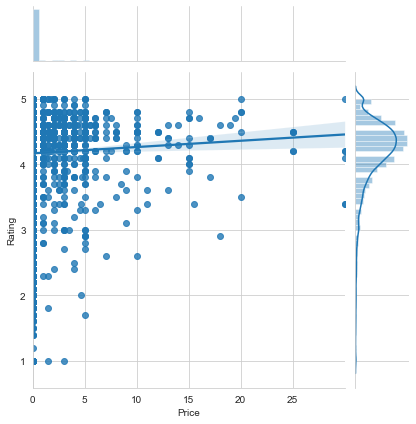

In [67]:
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')

### b. What pattern do you see?

Here we can see when the price is increasing the rating there is not much effect on rating as the most of the rating remains between 4-5

### c. How do you explain the pattern?

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

### d. Replot the data, this time with only records with price > 0 

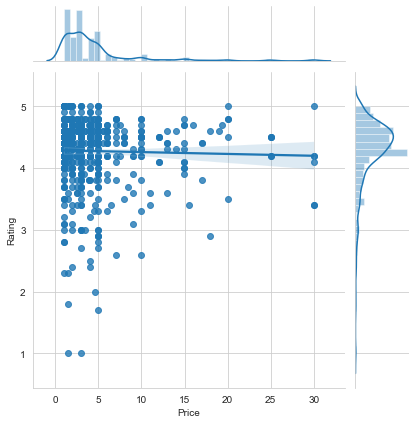

In [68]:
datanew=data.loc[data.Price>0]
sns.jointplot(x='Price', y='Rating', data=datanew, kind='reg')

### e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight i.e., their is very weakly Negative Correlation between Price and Rating.

In [70]:
datanew.corr()

Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.095986  0.117943  0.063960 -0.025975
Reviews   0.095986  1.000000  0.163959  0.787628 -0.049764
Size      0.117943  0.163959  1.000000  0.119255  0.024912
Installs  0.063960  0.787628  0.119255  1.000000 -0.057710
Price    -0.025975 -0.049764  0.024912 -0.057710  1.000000

### f. What is your overall inference on the effect of price on the rating

From the above analysis we analysed that there is no significant effect of price on rating as in most of the cases rating lies between 4-5 without being more effected with the price of the app

## 9. Look at all the numeric interactions together – 

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

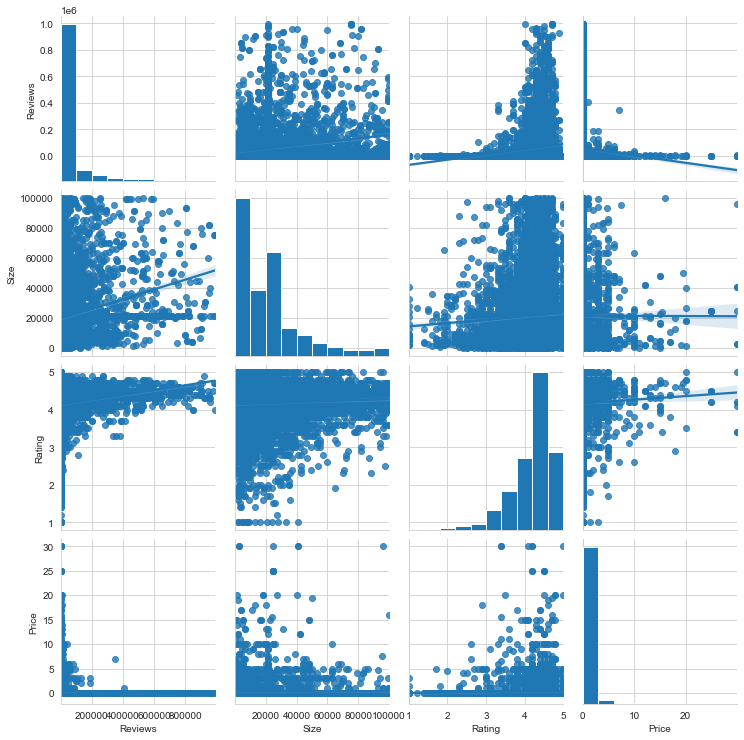

In [71]:
sns.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')

## 10. Rating vs. content rating

### a. Make a bar plot displaying the rating for each content rating

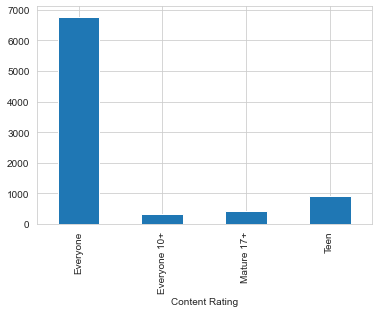

In [74]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar()

### b. Which metric would you use? Mean? Median? Some other quantile?

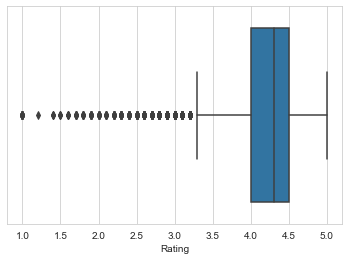

In [75]:
sns.boxplot(data['Rating'])

In this case we will use median because the particular data have outliers which shows that the data is a little biased in such case mean can also be biased that is why here we will use median 

### c. Choose the right metric and plot

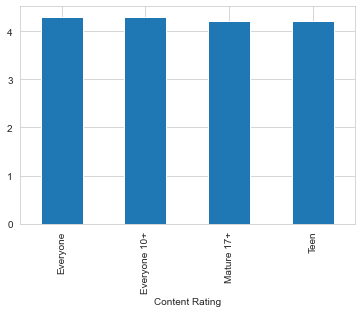

In [78]:
data.groupby(['Content Rating'])['Rating'].median().plot.bar()

## 11. Content rating vs. size vs. rating – 3 variables at a time

### a. Create 5 buckets (20% records in each) based on Size

In [79]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating  Everyone  Everyone 10+  Mature 17+      Teen
Bucket Size                                                 
0-20k           4.145730      4.247561    4.010582  4.182240
20k-40k         4.200195      4.169811    4.156291  4.170432
40k-60k         4.167083      4.263636    4.190476  4.237383
60k-80k         4.245408      4.280769    4.200000  4.274194
80k-100k        4.260127      4.304762    4.252632  4.270313

### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [81]:
apivot=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
apivot

Content Rating  Everyone  Everyone 10+  Mature 17+  Teen
Bucket Size                                             
0-20k               3.80          4.02         3.5   3.9
20k-40k             4.00          4.00         4.0   3.9
40k-60k             3.90          4.06         4.1   4.0
60k-80k             4.00          4.00         4.0   4.0
80k-100k            4.04          4.10         4.0   4.0

### c. Make a heatmap of this

#### i. Annotated

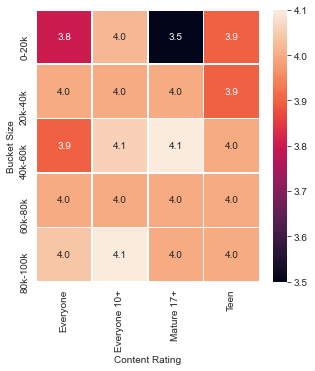

In [86]:
ann,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(apivot, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

#### ii. Greens color map

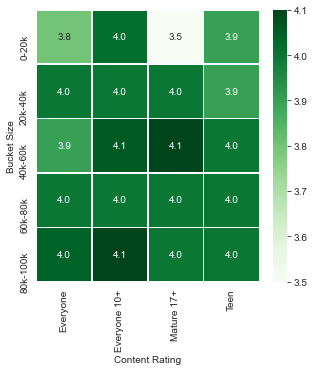

In [87]:
green,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(apivot, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories

                                                     Thank you!!!!